In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv("heart.csv") 

In [3]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9853658536585366


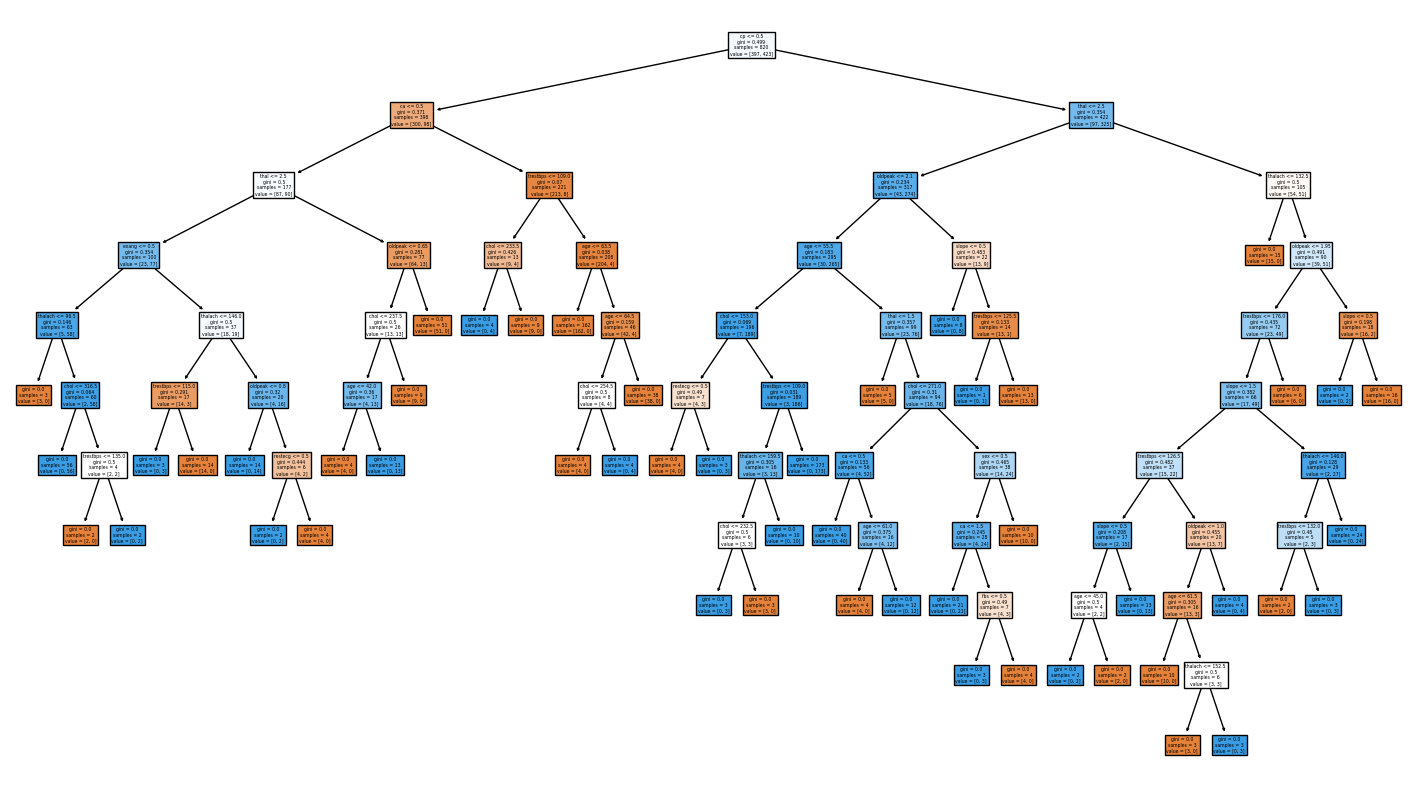

In [7]:
plt.figure(figsize=(18,10))
plot_tree(
    dt,
    feature_names=list(X.columns),   # FIXED LINE
    filled=True
)
plt.show()

In [9]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9853658536585366


In [10]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [13]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9853658536585366


In [16]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [17]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

cp          0.135072
ca          0.127327
thalach     0.122169
oldpeak     0.121905
thal        0.110518
age         0.077908
chol        0.074822
trestbps    0.071171
exang       0.057594
slope       0.045782
sex         0.028731
restecg     0.018557
fbs         0.008444
dtype: float64


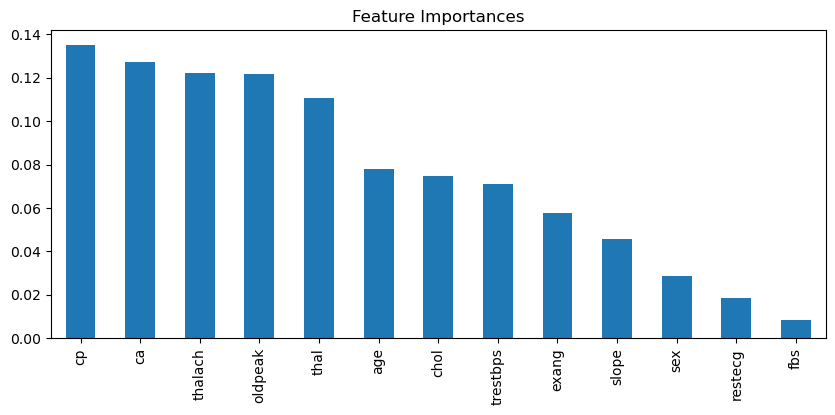

In [18]:
plt.figure(figsize=(10,4))
importances.plot(kind="bar")
plt.title("Feature Importances")
plt.show()

Decision Tree Confusion Matrix:
 [[102   0]
 [  3 100]]


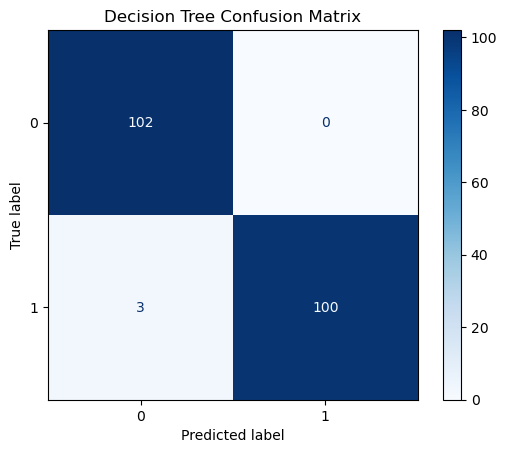

Random Forest Confusion Matrix:
 [[102   0]
 [  3 100]]


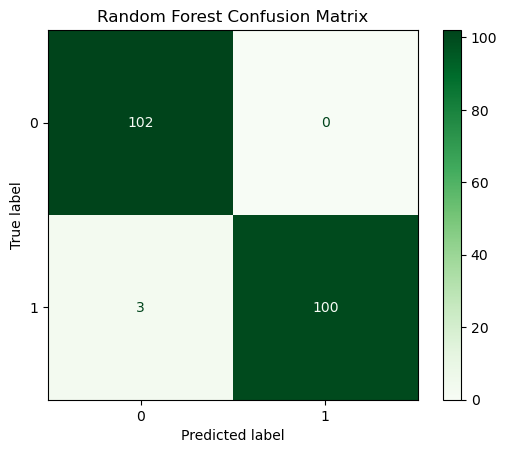

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:\n", cm_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=[0,1])
disp.plot(cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", cm_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0,1])
disp.plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()
